In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from scipy.optimize import curve_fit

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 100)

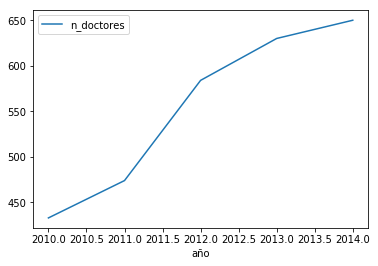

In [93]:
data = {'año':np.array([2010,2011,2012,2013,2014]), 'n_doctores':np.array([433.,474.,584.,630.,650.])}
data_df = pd.DataFrame(data)

data_df.plot(kind='line', x='año', y='n_doctores')

## Using linear regression model

In [104]:
X=data['año'][:, np.newaxis]
y=data['n_doctores']

poly = PolynomialFeatures(degree=1)
X_ = poly.fit_transform(X)

clf = linear_model.LinearRegression()
clf.fit(X_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
clf.score(X_,y)

0.94252263570593064

In [106]:
predict=np.arange(2010,2018).reshape(-1, 1)
predict_ = poly.fit_transform(predict)

print(clf.predict(predict_))

[ 436.2  495.2  554.2  613.2  672.2  731.2  790.2  849.2]


## Using sigmoid function

In [94]:
def sigmoid(x, x0, k, a, c):
    y = a / (1 + np.exp(-k*(x-x0))) + c
    return y

In [95]:
popt, pcov = curve_fit(sigmoid, data['año'], data['n_doctores'])
print(popt)
print(pcov)

[   1.            1.          460.02857002   94.17142998]
[[ inf  inf  inf  inf]
 [ inf  inf  inf  inf]
 [ inf  inf  inf  inf]
 [ inf  inf  inf  inf]]


/Users/rmunoz/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [97]:
x_predict=np.arange(2010,2018)
y_predict = sigmoid(predict, *popt)

print(y_predict)

[ 554.2  554.2  554.2  554.2  554.2  554.2  554.2  554.2]


## Using logistic regression model

In [80]:
clf = linear_model.LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
clf.coef_

array([[-0.00068962],
       [-0.00068931],
       [-0.000689  ],
       [-0.00068869],
       [-0.00068838]])

In [72]:
def model(x):
    return 1 / (1 + np.exp(-x))

predict=np.arange(2010,2018)[:, np.newaxis]
result = model(predict * clf.coef_ + clf.intercept_).ravel()
result

ValueError: operands could not be broadcast together with shapes (8,1) (5,1) 

In [78]:
clf.intercept_

array([ -3.41974421e-07,  -3.42210021e-07,  -3.42445509e-07,
        -3.42680886e-07,  -3.42916154e-07])

In [79]:
predict=np.arange(2010,2018)
predict * clf.coef_# + clf.intercept_

array([[-1.38613094, -1.38682056, -1.38751017, -1.38819979, -1.38888941,
        -1.38957902, -1.39026864, -1.39095826],
       [-1.38551008, -1.38619939, -1.3868887 , -1.38757801, -1.38826732,
        -1.38895663, -1.38964593, -1.39033524],
       [-1.38488946, -1.38557846, -1.38626746, -1.38695646, -1.38764546,
        -1.38833446, -1.38902346, -1.38971246],
       [-1.38426907, -1.38495776, -1.38564645, -1.38633514, -1.38702383,
        -1.38771252, -1.38840121, -1.3890899 ],
       [-1.3836489 , -1.38433729, -1.38502567, -1.38571405, -1.38640243,
        -1.38709082, -1.3877792 , -1.38846758]])

In [ ]:
data = {'año':[2010,2011,2012,2013,2014], 'n_doctores':[433,474,584,630,650]}
data_df = pd.DataFrame(data)

data_df.plot(kind='line', x='año', y='n_doctores')

## Analisis base de datos SIES

In [117]:
data_file="data/titulado_2007-2016_web_17-07-2017_.csv"
data_df=pd.read_csv(data_file, header=0, sep=';')

/Users/rmunoz/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [118]:
data_df.head()

,AÑO,TOTAL TITULADOS,TITULADOS MUJERES POR PROGRAMA,TITULADOS HOMBRES POR PROGRAMA,CLASIFICACIÓN INSTITUCIÓN NIVEL 1,CLASIFICACIÓN INSTITUCIÓN NIVEL 2,CLASIFICACIÓN INSTITUCIÓN NIVEL 3,CÓDIGO INSTITUCIÓN,NOMBRE INSTITUCIÓN,CIUDAD,REGIÓN,NOMBRE CARRERA,ÁREA DEL CONOCIMIENTO,OECD ÁREA,OECD SUBAREA,ÁREA CARRERA GENÉRICA,NIVEL GLOBAL,CARRERA CLASIFICACIÓN NIVEL 1,CARRERA CLASIFICACIÓN NIVEL 2,MODALIDAD,JORNADA,TIPO DE PLAN DE LA CARRERA,DURACIÓN ESTUDIO CARRERA,DURACIÓN TOTAL DE LA CARRERA,CÓDIGO CARRERA,TOTAL RANGO EDAD,RANGO DE EDAD 15 A 19 AÑOS,RANGO DE EDAD 20 A 24 AÑOS,RANGO DE EDAD 25 A 29 AÑOS,RANGO DE EDAD 30 A 34 AÑOS,RANGO DE EDAD 35 A 39 AÑOS,RANGO DE EDAD 40 Y MÁS AÑOS,RANGO DE EDAD SIN INFORMACIÓN,PROMEDIO EDAD CARRERA,PROMEDIO EDAD MUJER,PROMEDIO EDAD HOMBRE
0,TIT_2007,14,9.0,5.0,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,SANTIAGO,REGIÓN METROPOLITANA,CONTADOR AUDITOR,Administración y Comercio,"Ciencias Sociales, Enseñanza Comercial y Derecho",Enseñanza Comercial y Administración,Contador Auditor,Pregrado,Profesional Con Licenciatura,Carreras Profesionales,NaN,Vespertino,Plan Regular,8.0,9.0,A2007_C_0011010022,14,NaN,NaN,4.0,5.0,4.0,1.0,NaN,"33,5","33,9","32,8"
1,TIT_2007,7,2.0,5.0,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,PUERTO VARAS,X REGIÓN,P/E INGENIERIA COMERCIAL PARA CONTADORES AUDITORES E INGENIEROS DE EJECUCION EN ADMINISTRACION D...,Administración y Comercio,"Ciencias Sociales, Enseñanza Comercial y Derecho",Enseñanza Comercial y Administración,Ingeniería Comercial,Pregrado,Profesional Con Licenciatura,Carreras Profesionales,NaN,Vespertino,Plan Especial,3.0,4.0,A2007_C_0011020412,7,NaN,NaN,2.0,2.0,1.0,2.0,NaN,"33,7","31,5","34,6"
2,TIT_2007,4,3.0,1.0,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,PUERTO VARAS,X REGIÓN,INGENIERIA DE EJECUCION EN ADMINISTRACION DE EMPRESAS,Administración y Comercio,"Ciencias Sociales, Enseñanza Comercial y Derecho",Enseñanza Comercial y Administración,Administración de Empresas e Ing. Asociadas,Pregrado,Profesional Sin Licenciatura,Carreras Profesionales,NaN,Vespertino,Plan Regular,8.0,8.0,A2007_C_0011020202,4,NaN,1.0,3.0,NaN,NaN,NaN,NaN,"25,8","25,3",27
3,TIT_2007,28,14.0,14.0,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,SANTIAGO,REGIÓN METROPOLITANA,DERECHO,Derecho,"Ciencias Sociales, Enseñanza Comercial y Derecho",Derecho,Derecho,Pregrado,Profesional Con Licenciatura,Carreras Profesionales,NaN,Diurno,Plan Regular,10.0,12.0,A2007_C_0011010031,28,NaN,8.0,12.0,6.0,NaN,2.0,NaN,"27,9","27,9","27,9"
4,TIT_2007,17,17.0,NaN,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,SANTIAGO,REGIÓN METROPOLITANA,LICENCIATURA EN EDUCACION PARVULARIA,Educación,Educación,Ciencias de la Educación,Bachillerato y/o Licenciatura en Educación,Pregrado,Licenciatura No Conducente a Título,Carreras Profesionales,NaN,Diurno,Plan Regular,8.0,9.0,A2007_C_0011010051,17,NaN,8.0,8.0,1.0,NaN,NaN,NaN,"25,2","25,2",NaN


In [119]:
data_df.dtypes.to_frame().transpose()

,AÑO,TOTAL TITULADOS,TITULADOS MUJERES POR PROGRAMA,TITULADOS HOMBRES POR PROGRAMA,CLASIFICACIÓN INSTITUCIÓN NIVEL 1,CLASIFICACIÓN INSTITUCIÓN NIVEL 2,CLASIFICACIÓN INSTITUCIÓN NIVEL 3,CÓDIGO INSTITUCIÓN,NOMBRE INSTITUCIÓN,CIUDAD,REGIÓN,NOMBRE CARRERA,ÁREA DEL CONOCIMIENTO,OECD ÁREA,OECD SUBAREA,ÁREA CARRERA GENÉRICA,NIVEL GLOBAL,CARRERA CLASIFICACIÓN NIVEL 1,CARRERA CLASIFICACIÓN NIVEL 2,MODALIDAD,JORNADA,TIPO DE PLAN DE LA CARRERA,DURACIÓN ESTUDIO CARRERA,DURACIÓN TOTAL DE LA CARRERA,CÓDIGO CARRERA,TOTAL RANGO EDAD,RANGO DE EDAD 15 A 19 AÑOS,RANGO DE EDAD 20 A 24 AÑOS,RANGO DE EDAD 25 A 29 AÑOS,RANGO DE EDAD 30 A 34 AÑOS,RANGO DE EDAD 35 A 39 AÑOS,RANGO DE EDAD 40 Y MÁS AÑOS,RANGO DE EDAD SIN INFORMACIÓN,PROMEDIO EDAD CARRERA,PROMEDIO EDAD MUJER,PROMEDIO EDAD HOMBRE
0,object,int64,float64,float64,object,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object,int64,float64,float64,float64,float64,float64,float64,float64,object,object,object


In [122]:
data_df['AÑO'].unique()

array(['TIT_2007', 'TIT_2008', 'TIT_2009', 'TIT_2010', 'TIT_2011',
       'TIT_2012', 'TIT_2013', 'TIT_2014', 'TIT_2015', 'TIT_2016'], dtype=object)

In [120]:
data_df['NIVEL GLOBAL'].unique()

array(['Pregrado', 'Postítulo', 'Postgrado'], dtype=object)

In [121]:
data_df['CARRERA CLASIFICACIÓN NIVEL 1'].unique()

array(['Profesional Con Licenciatura', 'Profesional Sin Licenciatura',
       'Licenciatura No Conducente a Título', 'Postítulo', 'Magister',
       'Diplomado (superior a un semestre)', 'Técnico de Nivel Superior',
       'Especialidad Médica U Odontológica', 'Doctorado'], dtype=object)

In [127]:
data_df['CARRERA CLASIFICACIÓN NIVEL 2'].unique()

array(['Carreras Profesionales', 'Postítulo', 'Magister',
       'Carreras Técnicas', 'Doctorado'], dtype=object)

In [123]:
año_str={'TIT_2007':2017, 'TIT_2008':2008, 'TIT_2009':2009, 'TIT_2010':2010, 'TIT_2011':2011,
       'TIT_2012':2012, 'TIT_2013':2013, 'TIT_2014':2014, 'TIT_2015':2015, 'TIT_2016':2016}
data_df['año'] = data_df['AÑO'].map(año_str)

In [125]:
data_df['año'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [126]:
data_df[data_df['CARRERA CLASIFICACIÓN NIVEL 1']=='Doctorado'].groupby('año')['TOTAL TITULADOS'].sum()

año
2008    374
2009    383
2010    426
2011    492
2012    604
2013    639
2014    619
2015    692
2016    704
2017    315
Name: TOTAL TITULADOS, dtype: int64